In [580]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [581]:
test=pd.read_csv("test.csv")

In [582]:
train=pd.read_csv("train.csv")

In [583]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [584]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [585]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [586]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<Figure size 1440x720 with 0 Axes>

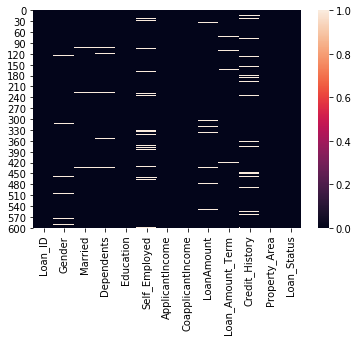

<Figure size 1440x720 with 0 Axes>

In [587]:
sns.heatmap(train.isnull())
plt.figure(figsize=(20,10))

In [588]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [589]:
train.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [590]:
train.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [591]:
train.Gender=train.Gender.replace(np.nan,"Male") 

In [592]:
  train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

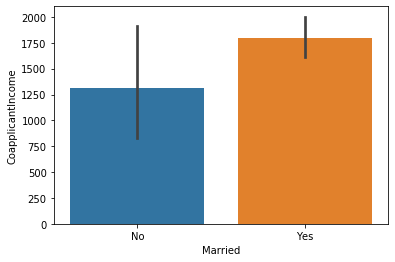

In [593]:
sns.barplot(x='Married',y='CoapplicantIncome',data=train)

In [594]:
train.loc[train['Married'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [595]:
train.loc[104,'Married']='Yes'
train['Married'].replace(np.nan,'No',inplace=True)

In [596]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [597]:
#train.Married=train.Married[(train.Married=='Yes')&(train.Education=='Yes')].replace(np.nan,"Yes")

In [598]:
#train.Married.isnull().sum()

In [599]:
##train['Married'].value_counts()

In [600]:
#train.isnull().sum()

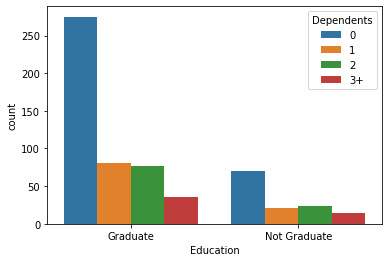

In [601]:
sns.countplot(x="Education",data=train,hue="Dependents")

In [602]:
train.Dependents=train.Dependents.replace(np.nan,0)

In [603]:
train.Dependents.isnull().sum()

0

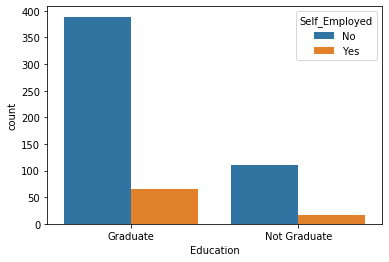

In [604]:
sns.countplot(x="Education",data=train,hue="Self_Employed")

In [605]:
##df=train[train['Self_Employed'].isnull()]
##df
##df['Self_Employed']=['Yes'if i=='Graduate'else 'No' for i in df['Education']]
##df.head()

In [606]:
train.loc[(train.Self_Employed.isnull())&(train.Education=="Graduate"),"Self_Employed"]="No"

In [607]:
train.loc[(train.Self_Employed.isnull())&(train.Education=="Not Graduate"),"Self_Employed"]="Yes"

In [608]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

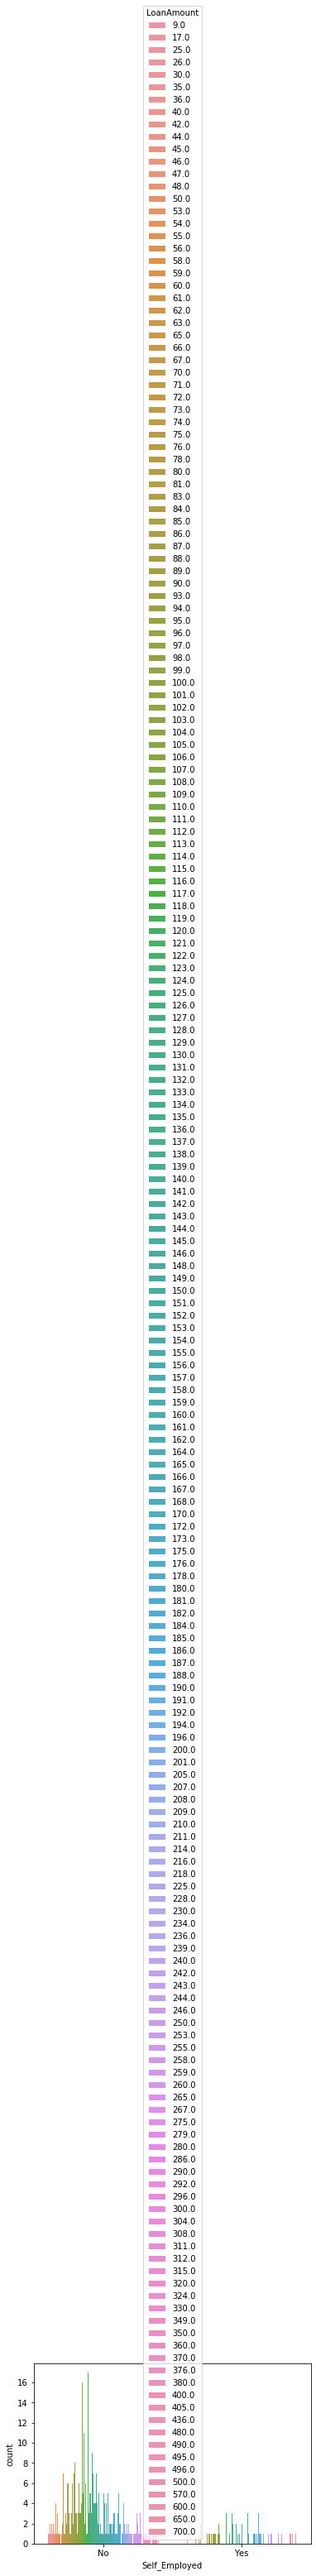

In [609]:
sns.countplot(x="Self_Employed",data=train,hue="LoanAmount")

In [610]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [611]:
train.LoanAmount.isnull().sum()

0

In [612]:
train.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [613]:
train.Loan_Amount_Term.value_counts()  ##assuming the value of loan_amount_term as categorical

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [614]:
train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].median(),inplace=True) ##that's why filling it with median.

In [615]:
train.Loan_Amount_Term

0      360.0
1      360.0
2      360.0
3      360.0
4      360.0
       ...  
609    360.0
610    180.0
611    360.0
612    360.0
613    360.0
Name: Loan_Amount_Term, Length: 614, dtype: float64

In [616]:
train.Loan_Amount_Term.isnull().sum()

0

In [617]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

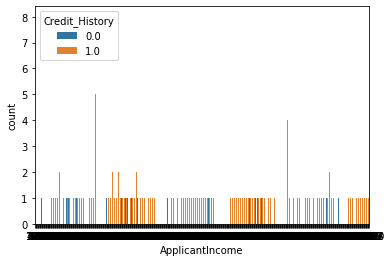

In [618]:
sns.countplot(x="ApplicantIncome",data=train,hue="Credit_History")

In [619]:
train.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [620]:
train.Credit_History=train.Credit_History.replace(np.nan,1.0)

In [621]:
train.Credit_History

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 614, dtype: float64

In [622]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [623]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Figure size 7200x7200 with 0 Axes>

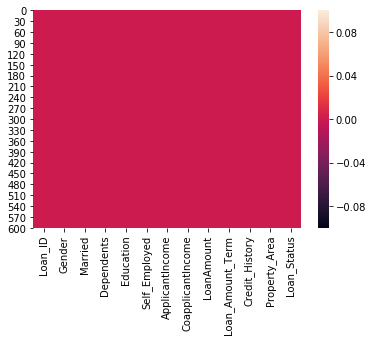

<Figure size 7200x7200 with 0 Axes>

In [624]:
sns.heatmap(train.isnull())
plt.figure(figsize=(100,100))

In [625]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [626]:
train=pd.get_dummies(train,columns=["Gender","Married","Dependents","Education","Self_Employed","Property_Area"],drop_first=True)
train.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,5849,0.0,128.0,360.0,1.0,Y,1,0,1,0,0,0,0,0,0,1
1,LP001003,4583,1508.0,128.0,360.0,1.0,N,1,1,0,1,0,0,0,0,0,0
2,LP001005,3000,0.0,66.0,360.0,1.0,Y,1,1,1,0,0,0,0,1,0,1
3,LP001006,2583,2358.0,120.0,360.0,1.0,Y,1,1,1,0,0,0,1,0,0,1
4,LP001008,6000,0.0,141.0,360.0,1.0,Y,1,0,1,0,0,0,0,0,0,1


In [627]:
train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615,0.058809,0.049360,-0.090174,0.040861,-0.034650,0.156687,-0.140760,0.114006,-0.014246,-0.000598
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134,0.082912,0.079569,0.000949,-0.029769,0.010016,0.041491,-0.062290,-0.015960,-0.027044,0.022776
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607,0.106904,0.146451,-0.136343,0.061976,0.020126,0.152850,-0.168759,0.103524,-0.005804,-0.036050
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.074030,-0.102559,0.106897,-0.088492,-0.010609,-0.077273,-0.073928,-0.025134,0.059141,-0.094279
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.009170,0.008103,0.046697,0.009757,0.007987,-0.060473,-0.073658,0.009977,0.035976,-0.016934
Gender_Male,0.058809,0.082912,0.106904,-0.074030,0.009170,1.000000,0.369393,-0.145082,-0.004466,0.129953,0.096319,0.045364,-0.011408,-0.108623,0.034530
Married_Yes,0.049360,0.079569,0.146451,-0.102559,0.008103,0.369393,1.000000,-0.345404,0.116654,0.252036,0.134334,0.015886,-0.001809,-0.002899,0.005326
Dependents_0,-0.090174,0.000949,-0.136343,0.106897,0.046697,-0.145082,-0.345404,1.000000,-0.505474,-0.502499,-0.340851,-0.042065,-0.079125,-0.006225,-0.052410
Dependents_1,0.040861,-0.029769,0.061976,-0.088492,0.009757,-0.004466,0.116654,-0.505474,1.000000,-0.198046,-0.134337,-0.013355,0.079688,0.011661,0.069320
Dependents_2,-0.034650,0.010016,0.020126,-0.010609,0.007987,0.129953,0.252036,-0.502499,-0.198046,1.000000,-0.133547,0.020822,0.031650,-0.012017,0.016569


In [628]:
pd.crosstab(train['Credit_History'],train['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,110,415,525
All,192,422,614


# ML Model

In [629]:
x=train.drop(['Loan_Status','Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount',
               'Loan_Amount_Term','Dependents_1','Dependents_3+','Education_Not Graduate',
               'Self_Employed_Yes','Property_Area_Urban'],axis=1)
y=train['Loan_Status']

In [630]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 21)

In [631]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors= 7)

In [632]:
clf.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [633]:
y_pred = clf.predict(x_test)

In [634]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [635]:
print('Accuracy_score: ',accuracy_score(y_test, y_pred)*100)
print('\n','Classification_report: ','\n','\n',classification_report(y_test, y_pred))

Accuracy_score:  82.11382113821138

 Classification_report:  
 
               precision    recall  f1-score   support

           N       0.86      0.50      0.63        38
           Y       0.81      0.96      0.88        85

    accuracy                           0.82       123
   macro avg       0.84      0.73      0.76       123
weighted avg       0.83      0.82      0.80       123



In [636]:
cm = confusion_matrix(y_test, y_pred)
print(cm) 

[[19 19]
 [ 3 82]]


In [637]:
#train.drop('Loan_ID',axis=1)

In [638]:
#train.corr()

In [639]:
#train.drop('LoanAmount',axis=1)

In [640]:
#pd.get_dummies(train,columns=['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','Property_Area'],drop_first=True)

In [641]:
#train1.corr()


# FOR TEST DATA

In [642]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [643]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [644]:
test.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.110335,0.493451,0.023249,0.099553
CoapplicantIncome,-0.110335,1.000000,0.150850,-0.010984,-0.071235
LoanAmount,0.493451,0.150850,1.000000,0.094950,-0.012578
Loan_Amount_Term,0.023249,-0.010984,0.094950,1.000000,-0.053593
Credit_History,0.099553,-0.071235,-0.012578,-0.053593,1.000000


In [645]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [646]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [647]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [648]:
test.Gender.value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [649]:
test.Gender=test.Gender.replace(np.nan,"Male")

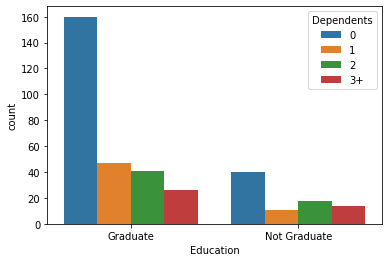

In [650]:
sns.countplot(x="Education",data=test,hue="Dependents")

In [651]:
test.Dependents=test.Dependents.replace(np.nan,0)

In [652]:
test.Dependents.isnull().sum()

0

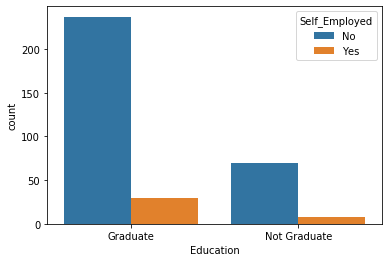

In [653]:
sns.countplot(x="Education",data=test,hue="Self_Employed")

In [654]:
test.loc[(test.Self_Employed.isnull())&(test.Education=="Graduate"),"Self_Employed"]="No"

In [655]:
test.loc[(test.Self_Employed.isnull())&(test.Education=="Not Graduate"),"Self_Employed"]="Yes"

In [656]:
test.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [657]:
test.Credit_History.value_counts()

1.0    279
0.0     59
Name: Credit_History, dtype: int64

In [658]:
test.Credit_History=test.Credit_History.replace(np.nan,1.0)
test.Credit_History

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
362    1.0
363    1.0
364    1.0
365    1.0
366    1.0
Name: Credit_History, Length: 367, dtype: float64

In [659]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     6
Credit_History       0
Property_Area        0
dtype: int64

In [660]:
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)

In [661]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     6
Credit_History       0
Property_Area        0
dtype: int64

In [662]:
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)

In [663]:
test['Loan_Amount_Term']

0      360.0
1      360.0
2      360.0
3      360.0
4      360.0
       ...  
362    360.0
363    360.0
364    360.0
365    360.0
366    180.0
Name: Loan_Amount_Term, Length: 367, dtype: float64

In [664]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [665]:
 ## OR this can be used to ##test.Loan_Amount_Term=test.Loan_Amount_Term.fillna(method='pad')

In [666]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [667]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [668]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [669]:
test=pd.get_dummies(test,columns=["Gender","Married","Dependents","Education","Self_Employed","Property_Area"],drop_first=True)
test.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001015,5720,0,110.0,360.0,1.0,1,1,1,0,0,0,0,0,0,1
1,LP001022,3076,1500,126.0,360.0,1.0,1,1,0,1,0,0,0,0,0,1
2,LP001031,5000,1800,208.0,360.0,1.0,1,1,0,0,1,0,0,0,0,1
3,LP001035,2340,2546,100.0,360.0,1.0,1,1,0,0,1,0,0,0,0,1
4,LP001051,3276,0,78.0,360.0,1.0,1,0,1,0,0,0,1,0,0,1


In [670]:
df_test=pd.get_dummies(test,drop_first=True)
df_test=test.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount',
               'Loan_Amount_Term','Dependents_1','Dependents_3+','Education_Not Graduate',
               'Self_Employed_Yes','Property_Area_Urban'],axis=1)

In [575]:
df_test.head()

,Education,Gender,Married,Property_Area,Self_Employed
0,0,1,0,0,0
1,0,0,1,0,0
2,0,0,0,0,0
3,1,0,0,0,0
4,0,0,0,0,1


In [576]:
#test1.corr()

In [577]:
#df_test=test1.drop(['ApplicantIncome','LoanAmount','Loan_Amount_Term','Dependents_1','Dependents_3+'], axis=1)

In [671]:
y_pred_test = clf.predict(df_test)

In [672]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [673]:
Y=pd.DataFrame(y_pred_test)

In [674]:
Y.head(10)

,0
0,Y
1,Y
2,Y
3,Y
4,Y
5,Y
6,Y
7,N
8,Y
9,Y


In [675]:
Y_pred_test = clf.predict(df_test)

In [679]:
sm=pd.read_csv("sample_submission.csv")

In [680]:
sm.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [681]:
submit=pd.concat([sm.Loan_ID,Y],axis=1)

In [682]:
submit.head()

,Loan_ID,0
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [683]:
submit.columns=["Loan_ID","Loan_Status"]

In [684]:
submit.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [685]:
submit['Loan_Status'].replace(0,'N',inplace=True)
submit['Loan_Status'].replace(1,'Y',inplace=True)

In [686]:
submit.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [687]:
submit['Loan_Status'].value_counts()

Y    308
N     59
Name: Loan_Status, dtype: int64

In [688]:
submit.to_csv("Submission1.csv",index=False)